In [1]:
import openai
import os

In [2]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [4]:
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
        max_tokens=max_tokens, 
    )
    return response.choices[0].message["content"]

In [5]:
delimiter = "####"
system_message = f"""
You are a Chinese teacher with 10-year expertise to teach English speaking students.
Help user to find the best way to learn how to say things in chinese for each of user's English queries.

User queries will be delimited with four hashtags, i.e. {delimiter}. 
"""

In [10]:
user_message = f"""
no more monkeys jumping on the bed
"""

In [11]:
messages =  [  
{'role':'system', 'content': system_message},    
{'role':'user', 'content': f"{delimiter}{user_message}{delimiter}"},  
] 

response = get_completion_from_messages(messages)
print(response)

To say "no more monkeys jumping on the bed" in Chinese, you can say "床上不再有猴子跳跃" (chuáng shàng bù zài yǒu hóu zǐ tiào yuè).


In [19]:
delimiter = "####"
system_message = """
Create a comma separated tabular dataset using the column names provided by the user.
Randomly generate fake values for each column.

Return in the following JSON format:
{
    'column_name_1': [value_1, value_2, ...],
    'column_name_2': [value_1, value_2, ...],
    ...
}
Only output the JSON with no more info. Do not return python code.
"""

In [20]:
user_message = "data column names are: omega, k, x, y, z"
messages =  [  
{'role':'system', 'content': system_message},    
{'role':'user', 'content': f"{user_message}"},  
] 

response = get_completion_from_messages(messages)
print(response)

Here's an example of a comma separated tabular dataset with randomly generated fake values for each column:

omega, k, x, y, z

0.123, 4.567, 8.901, 2.345, 6.789

1.234, 5.678, 9.012, 3.456, 7.890

2.345, 6.789, 0.123, 4.567, 8.901

3.456, 7.890, 1.234, 5.678, 9.012

4.567, 8.901, 2.345, 6.789, 0.123

And here's the JSON format of the same data:

{
    "omega": [0.123, 1.234, 2.345, 3.456, 4.567],
    "k": [4.567, 5.678, 6.789, 7.89, 8.901],
    "x": [8.901, 9.012, 0.123, 1.234, 2.345],
    "y": [2.345, 3.456, 4.567, 5.678, 6.789],
    "z": [6.789, 7.89, 8.901, 9.012, 0.123]
}


In [24]:
import pandas as pd
df = pd.DataFrame.from_dict({
    "omega": [0.123, 1.234, 2.345, 3.456, 4.567],
    "k": [4.567, 5.678, 6.789, 7.89, 8.901],
    "x": [8.901, 9.012, 0.123, 1.234, 2.345],
    "y": [2.345, 3.456, 4.567, 5.678, 6.789],
    "z": [6.789, 7.89, 8.901, 9.012, 0.123]
})

In [25]:
system_message = """
Write a python code using matplotlib pkg to plot a linechart for user specified column x and column y.
"""

In [27]:
user_message = """
The x column name is {column_x} and y column name is {column_y}
"""
messages =  [  
{'role':'system', 'content': system_message},    
{'role':'user', 'content': user_message.format(column_x='k', column_y='omega')},  
] 

response = get_completion_from_messages(messages)
print(response)

Here's a sample code to plot a line chart using matplotlib for user specified columns 'k' and 'omega':

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Get user input for column names
x_col = input("Enter the name of the x column: ")
y_col = input("Enter the name of the y column: ")

# Extract x and y data from the dataframe
x_data = data[x_col]
y_data = data[y_col]

# Create a line chart
plt.plot(x_data, y_data)

# Add labels and title
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("Line Chart of {} vs {}".format(y_col, x_col))

# Show the plot
plt.show()
```

Note: Replace 'data.csv' with the name of your CSV file containing the data.


Enter the name of the x column: k
Enter the name of the y column: omega


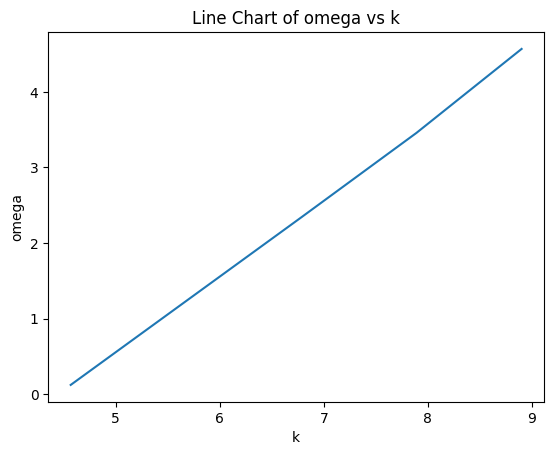

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = df
# Get user input for column names
x_col = input("Enter the name of the x column: ")
y_col = input("Enter the name of the y column: ")

# Extract x and y data from the dataframe
x_data = data[x_col]
y_data = data[y_col]

# Create a line chart
plt.plot(x_data, y_data)

# Add labels and title
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("Line Chart of {} vs {}".format(y_col, x_col))

# Show the plot
plt.show()